In [2]:
    # Th∆∞ vi·ªán c∆° b·∫£n
import pandas as pd
import numpy as np

# V·∫Ω bi·ªÉu ƒë·ªì th√¥ ban ƒë·∫ßu
import matplotlib.pyplot as plt
import seaborn as sns

# Th∆∞ vi·ªán ki·ªÉm tra th·ªëng k√™
from scipy import stats

In [3]:
# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Xem t·ªïng quan
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
# Ki·ªÉm tra t·ªïng s·ªë missing value t·ª´ng c·ªôt
missing_values = df.isnull().sum()

# Ch·ªâ in ra c√°c c·ªôt n√†o c√≥ missing > 0
missing_values[missing_values > 0]


Series([], dtype: int64)

In [5]:
# Ki·ªÉm tra t·ªïng s·ªë d√≤ng tr√πng l·∫∑p
duplicate_count = df.duplicated().sum()

print(f"S·ªë d√≤ng b·ªã tr√πng l·∫∑p: {duplicate_count}")


S·ªë d√≤ng b·ªã tr√πng l·∫∑p: 0


In [6]:
# Target variable
target_col = 'Attrition'

# Numerical variables
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

# Categorical variables
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Ordinal variables
ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
    'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Columns to drop
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [7]:
# Th·ªëng k√™ m√¥ t·∫£ nh√≥m bi·∫øn s·ªë
df[numerical_cols].describe().T


count          mean          std     min     25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.0   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.0   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.0   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.0   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.0   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
HourlyRate                  66.0     83.75    100.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
NumCompaniesWorked           2.0      4.00      9.0  
PercentSalaryHike           14.0     18.00     25.0  
TotalWorkingYears           10.0     15.00     40.0  
TrainingTimesLastYear        3.0      3.00      6.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

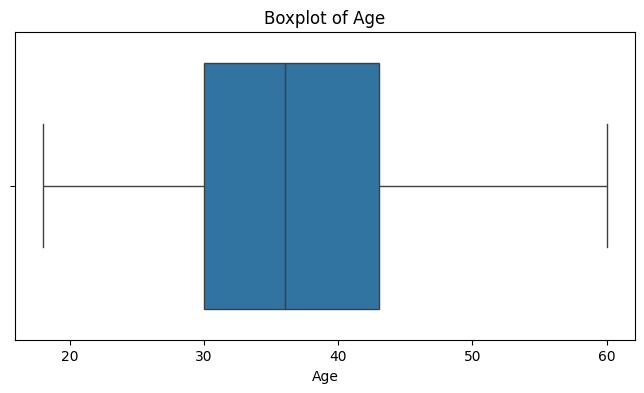

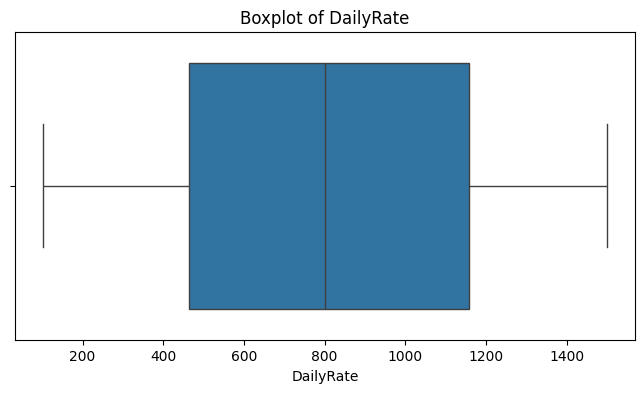

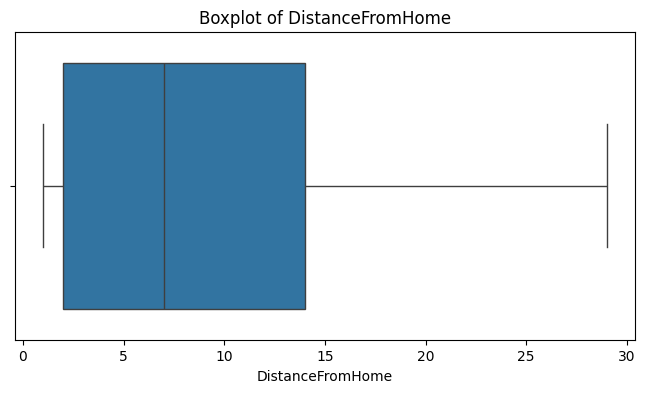

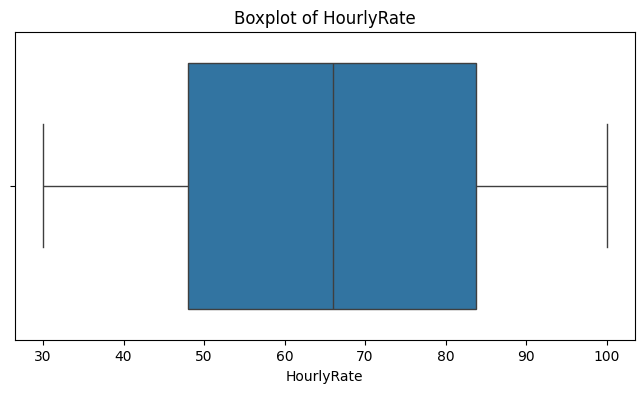

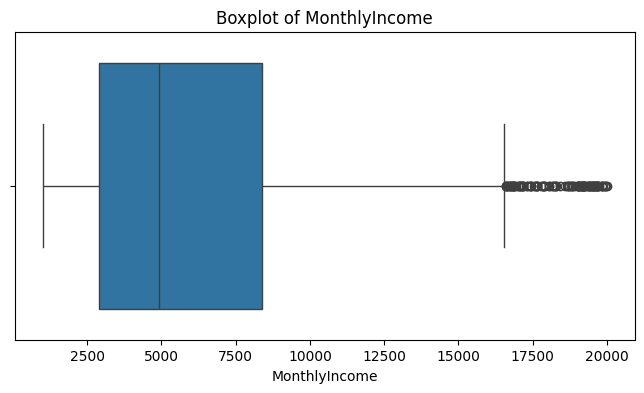

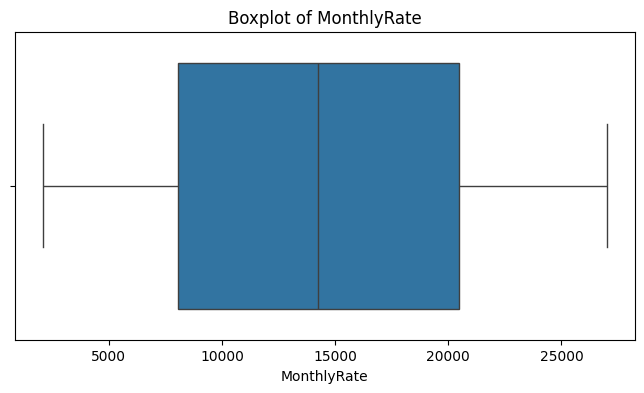

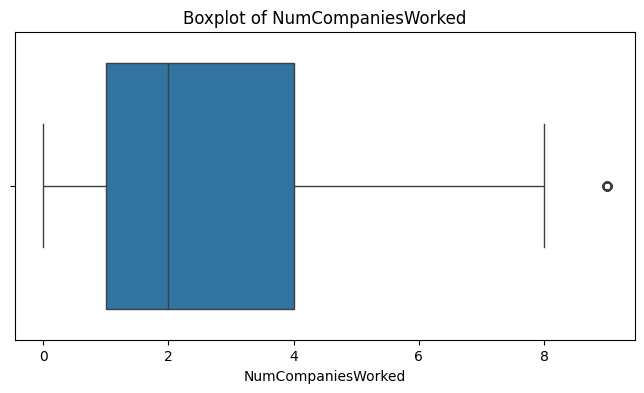

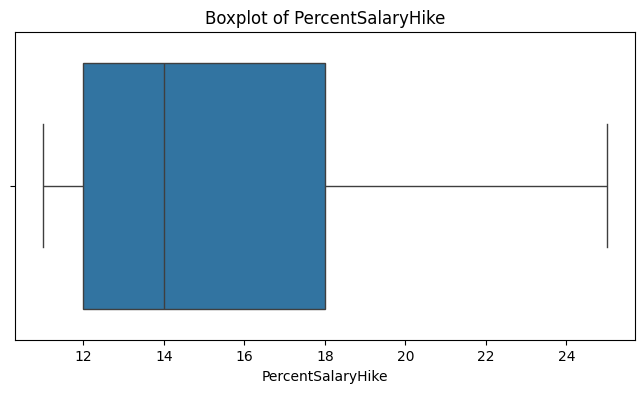

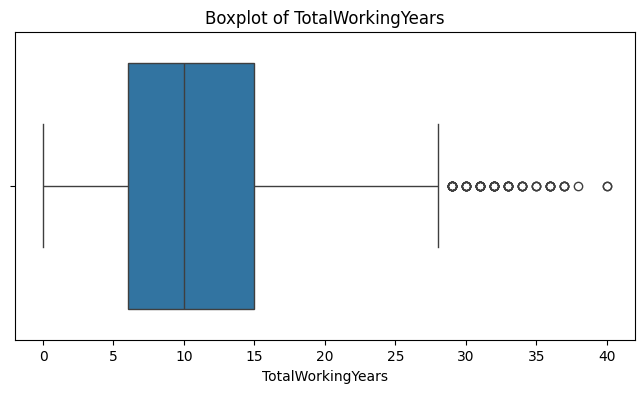

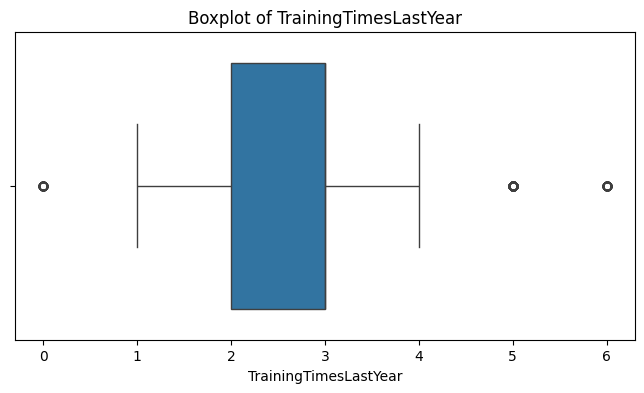

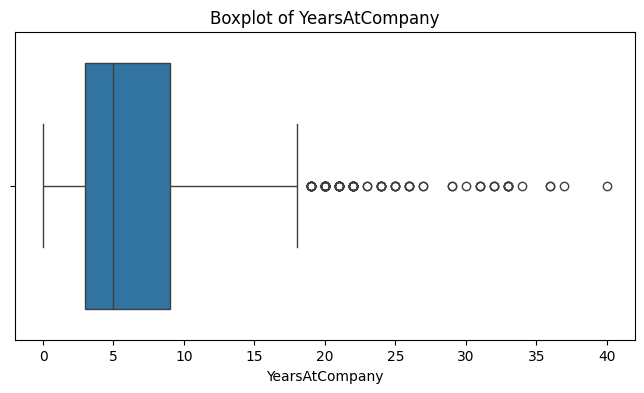

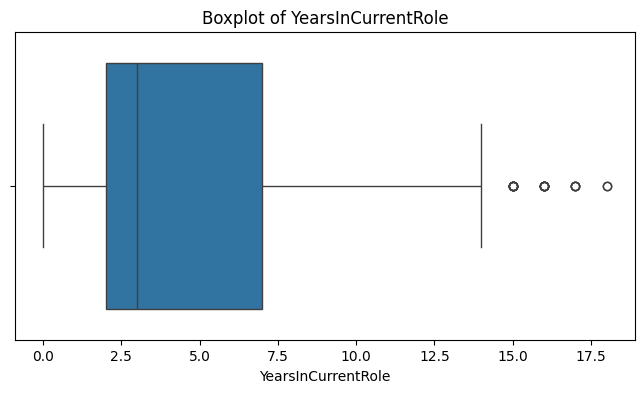

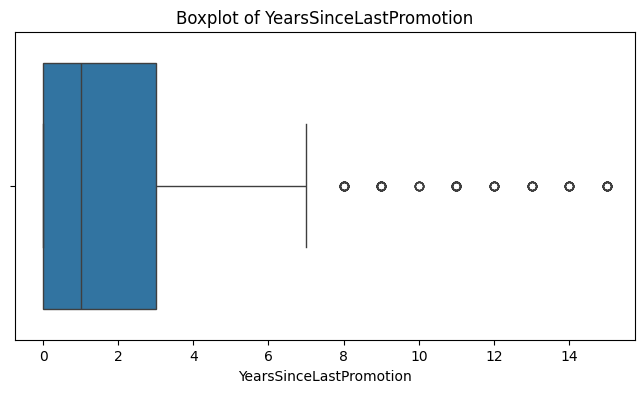

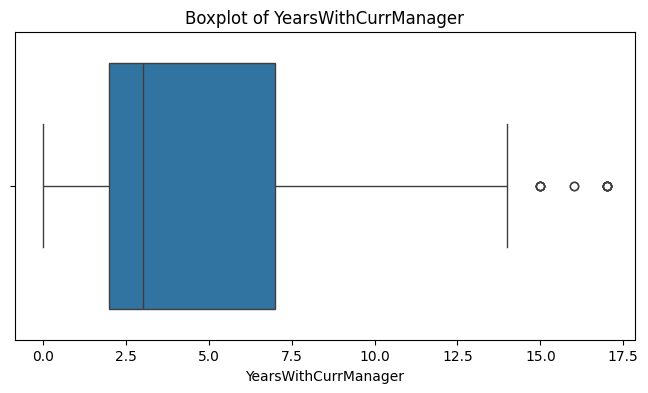

In [8]:
# V·∫Ω Boxplot t·ª´ng bi·∫øn s·ªë
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Nh·∫≠n x√©t: Nh√¨n s∆° qua th√¨ s·ªë li·ªáu kh√° ·ªïn ƒë·ªãnh, kh√¥ng c√≥ d·ªØ li·ªáu b·∫•t th∆∞·ªùng n√†o.

In [9]:
# B·ªè ƒë·ªÉ ƒë·ª° g√¢y nhi·ªÖu:
df.drop(columns=['MonthlyRate'], inplace=True)


- Trong qu√° tr√¨nh kh√°m ph√° d·ªØ li·ªáu (EDA), ch√∫ng t√¥i nh·∫≠n th·∫•y bi·∫øn MonthlyRate c√≥ ph√¢n b·ªë gi√° tr·ªã r·∫•t r·ªông, dao ƒë·ªông t·ª´ 2.094 ƒë·∫øn 26.999 USD.
Tuy nhi√™n, khi so s√°nh v·ªõi c√°c bi·∫øn kinh t·∫ø kh√°c nh∆∞ MonthlyIncome ‚Äì v·ªën tr·ª±c ti·∫øp th·ªÉ hi·ªán thu nh·∫≠p th·ª±c t·∫ø c·ªßa nh√¢n vi√™n, th√¨ MonthlyRate kh√¥ng c√≥ m·ªëi quan h·ªá r√µ r√†ng v·ªõi vi·ªác ngh·ªâ vi·ªác (Attrition).

In [10]:
# Chu·∫©n h√≥a datatype
for col in categorical_cols + [target_col]:
    df[col] = df[col].astype('category')

print("‚úÖ ƒê√£ chu·∫©n h√≥a datatype cho c√°c bi·∫øn ph√¢n lo·∫°i.")

‚úÖ ƒê√£ chu·∫©n h√≥a datatype cho c√°c bi·∫øn ph√¢n lo·∫°i.


In [11]:
#Ph√¢n nh√≥m
# Nh√≥m tu·ªïi
df['AgeBand'] = pd.cut(
    df['Age'], 
    bins=[17, 25, 30, 35, 40, 60], 
    labels=['18-25', '26-30', '31-35', '36-40', '41+']
)

df['AgeBand'] = df['AgeBand'].astype('category')

print("‚úÖ ƒê√£ sinh bi·∫øn AgeBand.")

# Nh√≥m th√¢m ni√™n l√†m vi·ªác
df['TenureBand'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-1, 1, 3, 5, 10, 40],
    labels=['<1y', '1-3y', '3-5y', '5-10y', '>10y']
)

df['TenureBand'] = df['TenureBand'].astype('category')

print("‚úÖ ƒê√£ sinh bi·∫øn TenureBand.")


# Nh√≥m m·ª©c thu nh·∫≠p
df['IncomeBand'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0, 3000, 5000, 8000, 12000, 20000],
    labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
)

df['IncomeBand'] = df['IncomeBand'].astype('category')

print("‚úÖ ƒê√£ sinh bi·∫øn IncomeBand.")



‚úÖ ƒê√£ sinh bi·∫øn AgeBand.
‚úÖ ƒê√£ sinh bi·∫øn TenureBand.
‚úÖ ƒê√£ sinh bi·∫øn IncomeBand.


# KPI 1: T·ª∑ l·ªá ngh·ªâ vi·ªác (Attrition Rate) theo Ph√≤ng ban v√† Ch·ª©c danh c√¥ng vi·ªác (Department/JobRole)
- Sau khi nh·∫≠n di·ªán ƒë∆∞·ª£c t·ª∑ l·ªá ngh·ªâ vi·ªác chung to√†n c√¥ng ty, c√¢u h·ªèi ti·∫øp theo ch√∫ng t√¥i ƒë·∫∑t ra l√†: "V·∫≠y th√¨, nh√¢n vi√™n ·ªü ƒë√¢u ƒëang ngh·ªâ vi·ªác nhi·ªÅu nh·∫•t?"

Kh√¥ng ph·∫£i t·∫•t c·∫£ c√°c ph√≤ng ban hay ch·ª©c danh ƒë·ªÅu ch·ªãu ·∫£nh h∆∞·ªüng nh∆∞ nhau. M·ªôt s·ªë b·ªô ph·∫≠n c√≥ th·ªÉ ƒëang ·ªïn ƒë·ªãnh, trong khi nh·ªØng b·ªô ph·∫≠n kh√°c l·∫°i √¢m th·∫ßm m·∫•t ƒëi m·ªôt l∆∞·ª£ng l·ªõn nh√¢n vi√™n.

Vi·ªác ph√¢n t√≠ch t·ª∑ l·ªá ngh·ªâ vi·ªác theo t·ª´ng Department (ph√≤ng ban) v√† Job Role (ch·ª©c danh c√¥ng vi·ªác) cho ph√©p ch√∫ng ta:

Khoanh v√πng ‚Äú·ªï d·ªãch‚Äù ‚Äì nh·ªØng n∆°i c√≥ nguy c∆° cao nh·∫•t.

∆Øu ti√™n ngu·ªìn l·ª±c ‚Äì t·∫≠p trung h√†nh ƒë·ªông ·ªü nh·ªØng n∆°i c·∫ßn thi·∫øt nh·∫•t.

Hi·ªÉu s√¢u b·∫£n ch·∫•t ‚Äì xem li·ªáu c√¥ng vi·ªác, m√¥i tr∆∞·ªùng, hay y√™u c·∫ßu c√¥ng vi·ªác c√≥ ƒëang ·∫£nh h∆∞·ªüng ƒë·∫øn quy·∫øt ƒë·ªãnh r·ªùi ƒëi c·ªßa nh√¢n vi√™n hay kh√¥ng.

V√¨ v·∫≠y, trong ph·∫ßn ti·∫øp theo, ch√∫ng t√¥i s·∫Ω ph√¢n t√≠ch Attrition Rate theo t·ª´ng Department v√† Job Role nh·∫±m x√°c ƒë·ªãnh nh·ªØng ƒëi·ªÉm n√≥ng v·ªÅ ngh·ªâ vi·ªác trong t·ªï ch·ª©c.

#### üîçKh√°m ph√° th√¥ng tin s∆° b·ªô v·ªÅ ph√≤ng ban v√† role

In [12]:

# T·ªïng s·ªë nh√¢n vi√™n theo Department
dept_total = df['Department'].value_counts()

# T·ªïng s·ªë nh√¢n vi√™n theo JobRole
jobrole_total = df['JobRole'].value_counts()

# In ra k·∫øt qu·∫£
print("T·ªïng s·ªë nh√¢n vi√™n theo Department:")
print(dept_total)

print("\nT·ªïng s·ªë nh√¢n vi√™n theo JobRole:")
print(jobrole_total)


T·ªïng s·ªë nh√¢n vi√™n theo Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

T·ªïng s·ªë nh√¢n vi√™n theo JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


#### üîçPh√¢n t√≠ch Attrition d·ª±a ph√≤ng ban v√† role

In [20]:
# üîπ T√≠nh attrition rate to√†n c√¥ng ty
attrition_total = (df['Attrition'] == 'Yes').mean() * 100
print(f"‚úÖ Attrition Rate to√†n c√¥ng ty: {attrition_total:.2f}%\n")

# üîπ T·∫°o b·∫£ng Department
dept_summary = pd.DataFrame({
    'S·ªë ngh·ªâ vi·ªác': df[df['Attrition'] == 'Yes']['Department'].value_counts(),
    'T·ªïng nh√¢n vi√™n': df['Department'].value_counts()
})
dept_summary['Attrition Rate (%)'] = (dept_summary['S·ªë ngh·ªâ vi·ªác'] / dept_summary['T·ªïng nh√¢n vi√™n']) * 100
dept_summary['Ch√™nh l·ªách v·ªõi trung b√¨nh (%)'] = dept_summary['Attrition Rate (%)'] - attrition_total
dept_summary = dept_summary.sort_values(by='Attrition Rate (%)', ascending=False)

print("üìä Th·ªëng k√™ ngh·ªâ vi·ªác theo Department:")
print(dept_summary)

# üîπ T·∫°o b·∫£ng JobRole
jobrole_summary = pd.DataFrame({
    'S·ªë ngh·ªâ vi·ªác': df[df['Attrition'] == 'Yes']['JobRole'].value_counts(),
    'T·ªïng nh√¢n vi√™n': df['JobRole'].value_counts()
})
jobrole_summary['Attrition Rate (%)'] = (jobrole_summary['S·ªë ngh·ªâ vi·ªác'] / jobrole_summary['T·ªïng nh√¢n vi√™n']) * 100
jobrole_summary['Ch√™nh l·ªách v·ªõi trung b√¨nh (%)'] = jobrole_summary['Attrition Rate (%)'] - attrition_total
jobrole_summary = jobrole_summary.sort_values(by='Attrition Rate (%)', ascending=False)

print("\nüìä Th·ªëng k√™ ngh·ªâ vi·ªác theo JobRole:")
print(jobrole_summary)


‚úÖ Attrition Rate to√†n c√¥ng ty: 16.12%

üìä Th·ªëng k√™ ngh·ªâ vi·ªác theo Department:
                        S·ªë ngh·ªâ vi·ªác  T·ªïng nh√¢n vi√™n  Attrition Rate (%)  \
Department                                                                 
Sales                             92             446           20.627803   
Human Resources                   12              63           19.047619   
Research & Development           133             961           13.839750   

                        Ch√™nh l·ªách v·ªõi trung b√¨nh (%)  
Department                                             
Sales                                        4.505354  
Human Resources                              2.925170  
Research & Development                      -2.282699  

üìä Th·ªëng k√™ ngh·ªâ vi·ªác theo JobRole:
                           S·ªë ngh·ªâ vi·ªác  T·ªïng nh√¢n vi√™n  Attrition Rate (%)  \
JobRole                                                                       
Sales Representati

C:\Users\PC\AppData\Local\Temp\ipykernel_3724\3308545605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


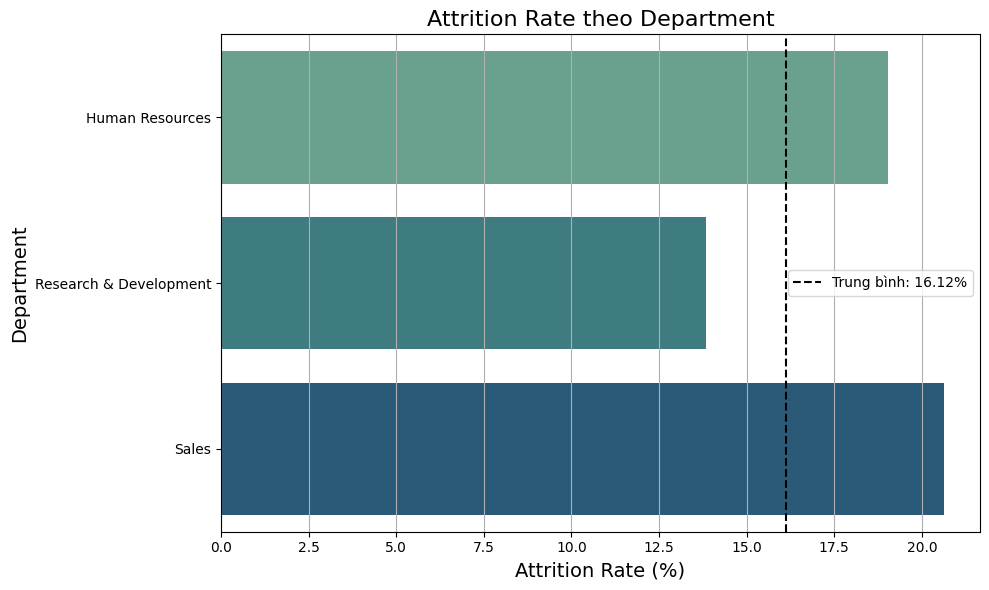

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Attrition Rate (%)',
    y=dept_summary.index,
    data=dept_summary,
    palette='crest'
)
plt.axvline(attrition_total, color='black', linestyle='--', label=f'Trung b√¨nh: {attrition_total:.2f}%')
plt.title('Attrition Rate theo Department', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_3724\538222816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


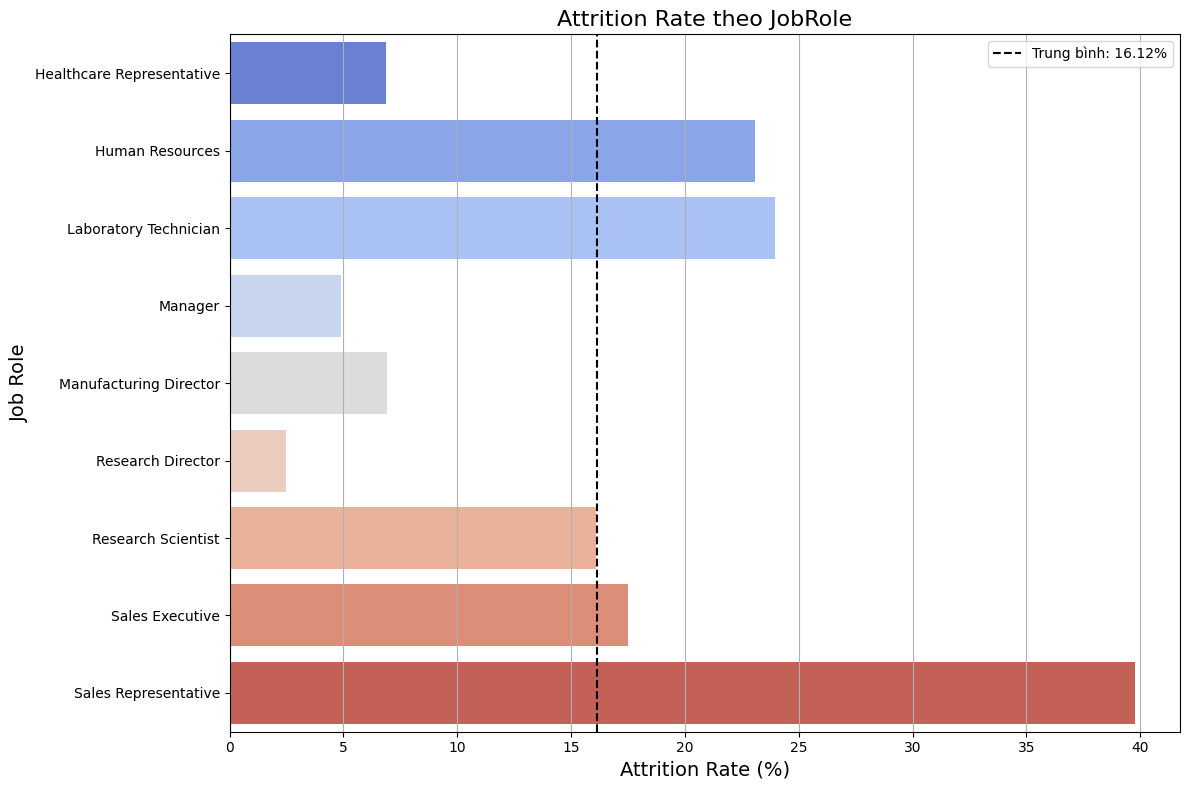

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Attrition Rate (%)',
    y=jobrole_summary.index,
    data=jobrole_summary,
    palette='coolwarm'
)
plt.axvline(attrition_total, color='black', linestyle='--', label=f'Trung b√¨nh: {attrition_total:.2f}%')
plt.title('Attrition Rate theo JobRole', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### üéØ KPI: Attrition Rate theo Department v√† Job Role



#### ‚úÖ B·ª©c tranh to√†n c·∫£nh: T·ª∑ l·ªá ngh·ªâ vi·ªác to√†n c√¥ng ty

> T·ª∑ l·ªá ngh·ªâ vi·ªác trung b√¨nh c·ªßa to√†n c√¥ng ty hi·ªán t·∫°i l√† **16.12%**.  
> ·ªû m·ª©c n√†y, c√≥ v·∫ª nh∆∞ m·ªçi th·ª© v·∫´n n·∫±m trong ng∆∞·ª°ng ch·∫•p nh·∫≠n ƒë∆∞·ª£c.

üü¢ *T√¢m l√Ω ban ƒë·∫ßu c·ªßa ng∆∞·ªùi ƒë·ªçc: "·ªîn m√†, kh√¥ng ƒë·∫øn m·ª©c ph·∫£i lo."*



#### üö® Nh·ªØng t√≠n hi·ªáu v∆∞·ª£t chu·∫©n b·∫Øt ƒë·∫ßu xu·∫•t hi·ªán‚Ä¶

üìä **Attrition Rate theo Department**:

| Department            | S·ªë ngh·ªâ vi·ªác | T·ªïng nh√¢n vi√™n | Attrition Rate (%) | So v·ªõi trung b√¨nh |
|----------------------|--------------|----------------|---------------------|--------------------|
| Sales                | 92           | 446            | **20.63%**          | **+4.51%**         |
| Human Resources      | 12           | 63             | 19.05%              | +2.93%             |
| Research & Development | 133        | 961            | 13.84%              | ‚Äì2.28%             |

> B·ªô ph·∫≠n **Sales** ‚Äì ƒë·ªông c∆° ch√≠nh c·ªßa doanh thu ‚Äì ƒëang c√≥ t·ª∑ l·ªá ngh·ªâ vi·ªác cao h∆°n trung b√¨nh ƒë·∫øn **4.5%**, t∆∞∆°ng ƒë∆∞∆°ng m·ª©c tƒÉng **28% so v·ªõi chu·∫©n**.

üü° *Kh√°n gi·∫£ b·∫Øt ƒë·∫ßu c·∫£m nh·∫≠n c√≥ ƒëi·ªÅu g√¨ ƒë√≥ kh√¥ng ·ªïn ƒëang √¢m th·∫ßm x·∫£y ra.*



#### üî• Cao tr√†o: Khoanh v√πng ‚Äú·ªï d·ªãch‚Äù b√™n trong b·ªô ph·∫≠n Sales

üìä **Attrition Rate theo Job Role**:

| Job Role              | S·ªë ngh·ªâ vi·ªác | T·ªïng nh√¢n vi√™n | Attrition Rate (%) | So v·ªõi trung b√¨nh |
|-----------------------|--------------|----------------|---------------------|--------------------|
| Sales Representative  | 33           | 83             | **39.76%**          | **+23.64%**        |
| Laboratory Technician | 62           | 259            | 23.94%              | +7.82%             |
| Sales Executive       | 57           | 326            | 17.48%              | +1.36%             |

> **G·∫ßn 40%** nh√¢n vi√™n **Sales Representative** r·ªùi b·ªè c√¥ng ty.  
> ƒêi·ªÅu n√†y nghƒ©a l√† **c·ª© 5 ng∆∞·ªùi ƒë∆∞·ª£c tuy·ªÉn th√¨ 2 ng∆∞·ªùi s·∫Ω r·ªùi ƒëi** trong th·ªùi gian ng·∫Øn.

> ƒê√¢y kh√¥ng c√≤n l√† m·ªôt con s·ªë ‚Äúb√°o ƒë·ªông‚Äù ‚Äì n√≥ l√† m·ªôt **·ªï d·ªãch nh√¢n s·ª± th·ª±c s·ª±**.

üî¥ *Ng∆∞·ªùi ƒë·ªçc b·ªã k√©o v√†o v√πng nguy hi·ªÉm. ƒê√¢y l√† ƒëi·ªÉm cao tr√†o c·ªßa c√¢u chuy·ªán.*



#### üí∏ T√°c ƒë·ªông th·ª±c t·∫ø: ‚ÄúCon s·ªë nh·ªè, thi·ªát h·∫°i l·ªõn‚Äù

> V·ªõi chi ph√≠ tuy·ªÉn d·ª•ng ‚Äì ƒë√†o t·∫°o trung b√¨nh ∆∞·ªõc t√≠nh **10.000 USD/ng∆∞·ªùi**,  
> C√¥ng ty ƒëang thi·ªát h·∫°i t·ªõi **330.000 USD/nƒÉm** ch·ªâ ri√™ng ·ªü nh√≥m Sales Representative.

üí• *C·∫£m x√∫c chuy·ªÉn sang t√†i ch√≠nh ‚Äì ƒëau v√≠ ti·ªÅn ‚Äì th√¥i th√∫c h√†nh ƒë·ªông ngay.*



#### üß† K·∫øt lu·∫≠n & D·∫´n d·∫Øt

> üëâ **Sales Representative l√† "·ªï d·ªãch tr·ªçng t√¢m" c·∫ßn ∆∞u ti√™n ph√¢n t√≠ch nguy√™n nh√¢n.**  
> üëâ C√°c y·∫øu t·ªë c·∫ßn l√†m r√µ ti·∫øp theo: **OverTime**, **Job Satisfaction**, **Thu nh·∫≠p**.

üß≠ *C√¢u chuy·ªán ƒë√£ ƒëi ƒë·∫øn cao tr√†o v√† m·ªü ra ch∆∞∆°ng m·ªõi ‚Äì t√¨m nguy√™n nh√¢n v√† gi·∫£i ph√°p.*


